## Missing value Handleing (3 Types)

 1. Missing Completely at Random, MCAR
 2. Missing at Random MAR:
 3. Missing data not at random (MNAR) 

In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("./Data/Titanic-Dataset.csv")
print(df.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [10]:
### checking missing values

df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [13]:
# column wise delete the null values, meaning if we have a column with huge number of null values, we can drop that column
df.dropna(axis=1) # inplace=True will make it permanent change
#It removed age and cabin, Embarked columns

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare
0,1,0,3,"Braund, Mr. Owen Harris",male,1,0,A/5 21171,7.2500
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,0,PC 17599,71.2833
2,3,1,3,"Heikkinen, Miss. Laina",female,0,0,STON/O2. 3101282,7.9250
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1,0,113803,53.1000
4,5,0,3,"Allen, Mr. William Henry",male,0,0,373450,8.0500
...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,0,0,211536,13.0000
887,888,1,1,"Graham, Miss. Margaret Edith",female,0,0,112053,30.0000
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,1,2,W./C. 6607,23.4500
889,890,1,1,"Behr, Mr. Karl Howell",male,0,0,111369,30.0000


# Imputation missing values
### 1. Mean value imputation (Suitable for Normal distributed data)
### 2. Median Value Imputation (Suitable for Outliers) (Right / left Squed)
### 3. Mode value Imputation (Suitable for categorical values)

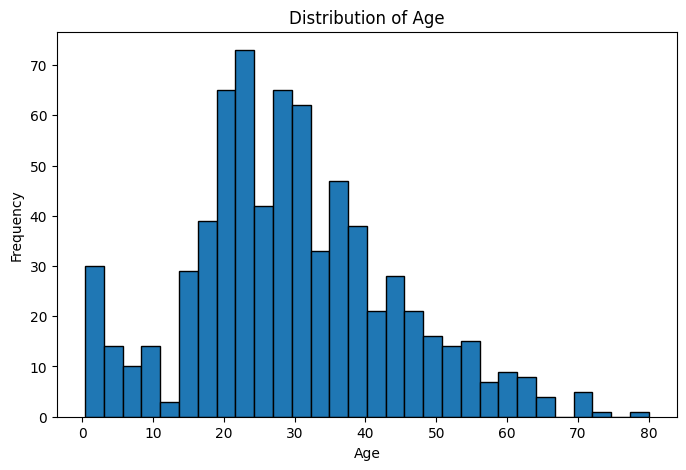

In [15]:
plt.figure(figsize=(8, 5))
df['Age'].plot(kind='hist', bins=30, edgecolor='black')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

<Axes: xlabel='Age', ylabel='Count'>

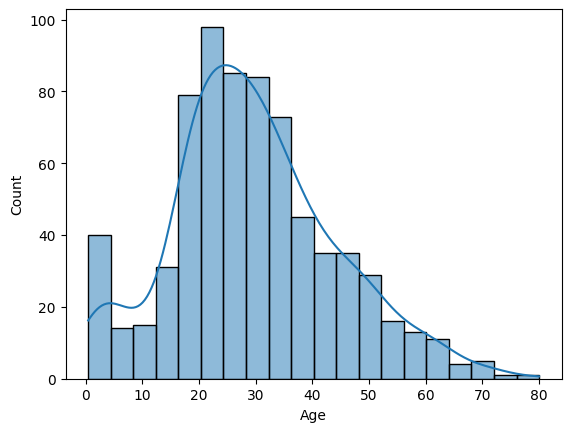

In [18]:
sns.histplot(df['Age'], kde=True)

# Kernel Density Estimate. In histplot, setting kde=True 
# adds a smooth curve that estimates the probability density function of the data

In [22]:
# Replacing Null values of age with mean value
df['Age_mean'] = df['Age'].fillna(df['Age'].mean())

In [23]:
df[['Age', 'Age_mean']]

,Age,Age_mean
0,22.0,22.000000
1,38.0,38.000000
2,26.0,26.000000
3,35.0,35.000000
4,35.0,35.000000
...,...,...
886,27.0,27.000000
887,19.0,19.000000
888,NaN,29.699118
889,26.0,26.000000


### Mean imputation works well when we have normally distrubuted data, 

What if we have left squed/right squed data/ distribution (We have outliers in the data)? For this we will use 

### Median value imputation

In [24]:
df['Age_median'] = df['Age'].fillna(df['Age'].median())

In [25]:
df[['Age', 'Age_median', 'Age_mean']]

,Age,Age_median,Age_mean
0,22.0,22.0,22.000000
1,38.0,38.0,38.000000
2,26.0,26.0,26.000000
3,35.0,35.0,35.000000
4,35.0,35.0,35.000000
...,...,...,...
886,27.0,27.0,27.000000
887,19.0,19.0,19.000000
888,NaN,28.0,29.699118
889,26.0,26.0,26.000000


In [31]:
### Mode Imputational Variables 
# More suitable for categorical variables
df['Embarked'].unique()


array(['S', 'C', 'Q', nan], dtype=object)

In [32]:
df[df['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_median,Age_mean
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN,38.0,38.0
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN,62.0,62.0


In [40]:
# df['Embarked'].notna(): Returns a boolean Series that is True where the 'Embarked' column is not NaN (i.e., not missing).
# df[df['Embarked'].notna()]: Filters the DataFrame to include only rows where 'Embarked' is not missing.
# ['Embarked']: Selects the 'Embarked' column from the filtered DataFrame.
# .mode(): Returns the most frequent value(s) (the mode) in the 'Embarked' column.
# [0]: Gets the first mode value (in case there are multiple modes).

mode_value = df[df['Embarked'].notna()]['Embarked'].mode()[0]

In [41]:
df['Embarked_mode'] = df['Embarked'].fillna(mode_value)

df[['Embarked', 'Embarked_mode']]

,Embarked,Embarked_mode
0,S,S
1,C,C
2,S,S
3,S,S
4,S,S
...,...,...
886,S,S
887,S,S
888,S,S
889,C,C


In [42]:
df['Embarked_mode'].isnull().sum()  # Check if there are any null values left in the 'Embarked_mode' column

0

# Handleing Imbalance Data Set

1. Where we are imbalance data, let's say we have 1000 data sets and we are going for Classification Machine leanrning (Supervies) (yes/no) category
2. and imagin there are 900 records are there for yes and 100 records are there for no.

so in this cases there is an  imbalance of data.

We are resolve this by 2 ways

1. Up Sampling 
2. Down Sampling

In [ ]:
import numpy as np
import pandas as pd

# This ensures that any random numbers you generate after this line (using NumPy’s random functions)
#  will be the same every time you run your code.
np.random.seed(123)

#create dataframe with 2 classes

n_sample = 1000
class_0_ratio = 0.9
n_class_0 = int(n_sample * class_0_ratio)
n_class_1 = n_sample - n_class_0



In [45]:
print(n_class_0, n_class_1)

900 100


In [ ]:
class_0 = pd.DataFrame({
    'feature_1': np.random.normal(loc=0, scale=1, size=n_class_0),
    'feature_2': np.random.normal(loc=0, scale=1, size=n_class_0),
    'target': [0] * n_class_0
})

class_1 = pd.DataFrame({
    'feature_1': np.random.normal(loc=2, scale=1, size=n_class_1),
    'feature_2': np.random.normal(loc=2, scale=1, size=n_class_1),
    'target': [1] * n_class_1
})

df = pd.concat([class_0, class_1]).reset_index(drop=True)

df.head()


,feature_1,feature_2,target
0,-1.085631,0.551302,0
1,0.997345,0.419589,0
2,0.282978,1.815652,0
3,-1.506295,-0.252750,0
4,-0.578600,-0.292004,0


In [47]:
df.target.value_counts()

target
0    900
1    100
Name: count, dtype: int64

In [48]:
# Up sampling

df_minority = df[df['target'] == 1]
df_majority = df[df['target'] == 0]

from sklearn.utils import resample

df_minority_upsampled = resample(df_minority, replace=True, n_samples=len(df_majority), random_state=123)

In [50]:
df_minority_upsampled.shape

(900, 3)

In [52]:
df_upsampled = pd.concat([df_majority, df_minority_upsampled])

In [53]:
df_upsampled['target'].value_counts()

target
0    900
1    900
Name: count, dtype: int64

# Down Sampling 

In [57]:
df_minority = df[df['target'] == 1]
df_majority = df[df['target'] == 0]

from sklearn.utils import resample

df_majority_down_sampled = resample(df_majority, replace=False, n_samples=len(df_minority), random_state=123) 
# replace would be false because we are removing data points

In [58]:
df_down_sampled = pd.concat([df_minority, df_majority_down_sampled])

In [60]:
df_down_sampled['target'].value_counts()

target
1    100
0    100
Name: count, dtype: int64

# Handleing Imbalance data using Smote

In [62]:
from sklearn.datasets import make_classification
import pandas as pd
#random_state=123 ensures that the random numbers generated are reproducible basically seeds.

X,y = make_classification(n_samples=1000, n_features=2, n_redundant=0, n_clusters_per_class=1, weights=[0.9], random_state=123)
df1 = pd.DataFrame(X, columns=['feature_1', 'feature_2'])
df2 = pd.DataFrame(y, columns=['target'])
df = pd.concat([df1, df2], axis=1)

df.head()

,feature_1,feature_2,target
0,-1.370383,-1.036569,1
1,2.022352,0.599597,0
2,0.232392,1.369993,0
3,0.601162,0.393403,0
4,1.530545,0.822184,0


In [63]:
df.target.value_counts()

target
0    896
1    104
Name: count, dtype: int64

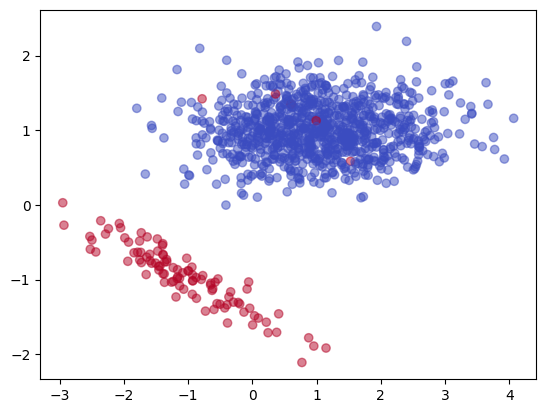

In [64]:
import matplotlib.pyplot as plt

plt.scatter(df['feature_1'], df['feature_2'], c=df['target'], cmap='coolwarm', alpha=0.5)

In [ ]:
from imblearn.over_sampling import SMOTE

# Error in using SMOTE
#transferm the dataset 
# oversampler = SMOTE()
# X_resampled, y_resampled = oversampler.fit_resample(df[['feature_1', 'feature_2']], df['target'])

# df1_resampled = pd.DataFrame(X_resampled, columns=['feature_1', 'feature_2'])
# df2_resampled = pd.DataFrame(y_resampled, columns=['target'])
# df_resampled = pd.concat([df1_resampled, df2_resampled], axis=1)

# plt.scatter(df_resampled['feature_1'], df_resampled['feature_2'], c=df_resampled['target'], cmap='coolwarm', alpha=0.5)


ImportError: cannot import name 'SPARSE_ARRAY_PRESENT' from 'sklearn.utils.fixes' (/Users/sarangia/Desktop/Master/Learning/Gen AI/.venv/lib/python3.11/site-packages/sklearn/utils/fixes.py)

# 5 Number Summary and Box Plot (handling Outliers)

#### Mininum, Q1, Median, Q3, Maximum

In [70]:
import numpy as np

list_marks = [45, 32, 56, 78, 90, 23, 67, 89, 45, 34, 98, 99, 30, 30, 40, 50, 60, 70, 80]

minimum = np.min(list_marks)
q1 = np.percentile(list_marks, 25)
median = np.median(list_marks)
q3 = np.percentile(list_marks, 75)
maximum = np.max(list_marks)
print(f"Minimum: {minimum}, Q1: {q1}, Median: {median}, Q3: {q3}, Maximum: {maximum}")

Minimum: 23, Q1: 37.0, Median: 56.0, Q3: 79.0, Maximum: 99


In [71]:
IQR = q3 - q1
print(f"IQR: {IQR}")

IQR: 42.0


In [72]:
# Lower Fence = q1 - 1.5 * IQR
# Upper Fence = q3 + 1.5 * IQR
lower_fence = q1 - 1.5 * IQR
upper_fence = q3 + 1.5 * IQR
print(f"Lower Fence: {lower_fence}, Upper Fence: {upper_fence}")

Lower Fence: -26.0, Upper Fence: 142.0


<Axes: >

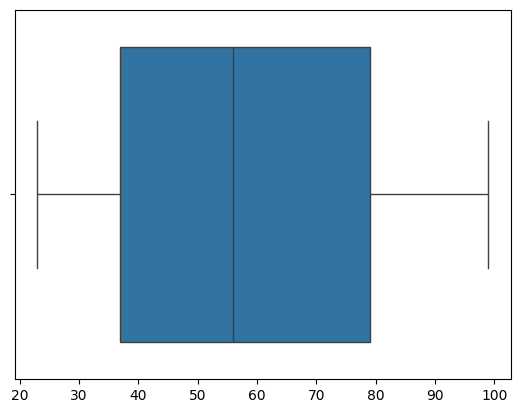

In [ ]:
import seaborn as sns

sns.boxplot(list_marks)

<Axes: >

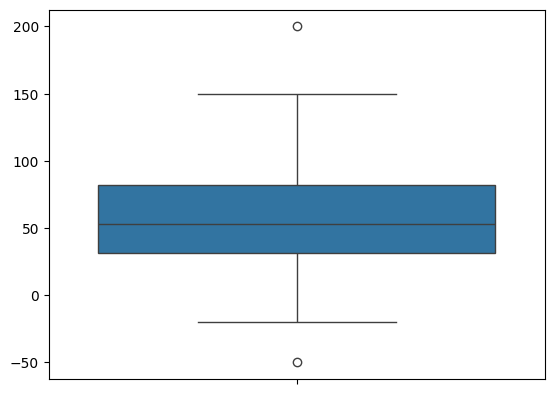

In [ ]:
list_marks_outlier = [-50, -20,-10, 45, 32, 56, 78, 90, 23, 67, 89, 45, 34, 98, 99, 30, 30, 40, 50, 60, 70, 80, 150, 200]
sns.boxplot(list_marks_outlier)

# in box plot we are seeing min, q1, median, q3 and max (5 number summary)